In [84]:
import xarray as xr
import os
import warnings
warnings.filterwarnings('ignore')


ds = xr.open_mfdataset(os.path.join("..", "data", "SPI_MINT.nc"))

In [85]:
ds.data_vars

Data variables:
    spi      (time, latitude, longitude) float64 dask.array<chunksize=(107, 52, 74), meta=np.ndarray>
    title    object ...
    summary  object ...

In [86]:
list(ds.dims)

['latitude', 'longitude', 'time']

In [87]:
ds.spi.attrs

OrderedDict([('title', 'Standardized Precipitation Index'),
             ('standard_name',
              'atmosphere_water__standardized_precipitation_wetness_index'),
             ('long_name', 'Standardized Precipitation Index'),
             ('units', 'unitless'),
             ('valid_min', -2.610587580133077),
             ('valid_max', 3.09),
             ('valid_range', array([-2.61058758,  3.09      ]))])

In [89]:
ds.time.values[0:5]

array(['2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-05-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [64]:
import pandas as pd
import skspatial
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
df = pd.read_csv(os.path.join("..", "data", "SPI_MINT_OUTPUT.csv"))

In [65]:
df.head()

,latitude,longitude,time,spi,title,summary
0,6.724998,24.024994,2010-01-01,1.798431,Standardized Precipitation Index,monthly standardized precipitation index infer...
1,6.724998,24.024994,2010-02-01,-0.736793,Standardized Precipitation Index,monthly standardized precipitation index infer...
2,6.724998,24.024994,2010-03-01,0.979015,Standardized Precipitation Index,monthly standardized precipitation index infer...
3,6.724998,24.024994,2010-04-01,0.420389,Standardized Precipitation Index,monthly standardized precipitation index infer...
4,6.724998,24.024994,2010-05-01,0.611951,Standardized Precipitation Index,monthly standardized precipitation index infer...


In [66]:
len(df)

411736

In [67]:
df.drop_duplicates(subset=["latitude", "longitude"], inplace=True)
len(df)

3848

In [80]:
df['geometry'] = df.apply(lambda i: Point(i['longitude'],i['latitude']),axis=1)
gdf = gpd.GeoDataFrame(df,geometry='geometry')
gdf.crs = {'init': 'epsg:4326'}
gdf.crs
gdf = gdf.to_crs({'init': 'epsg:20135'})
gdf.crs

{'init': 'epsg:20135'}

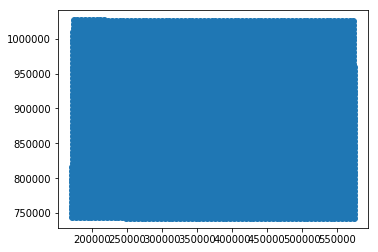

In [81]:
gdf.plot()

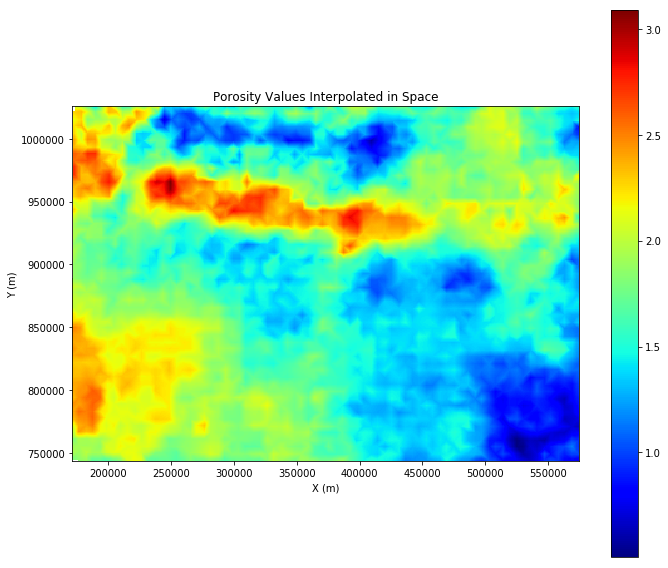

In [82]:
ml = skspatial.interp2d(gdf, attribute='spi', res=1000)
# knn = ml.knn_2D(k=5, weights='uniform', algorithm='brute', p=2)
array = ml.interpolate_2D(method='linear')
grid = ml.points_to_grid()

ax = ml.plot_image(array, title='Porosity Values Interpolated in Space')

ax.set_xlabel("X (m)", size=10)
ax.set_ylabel("Y (m)", size=10)
plt.savefig("SPI_Interpolated.png")
plt.tight_layout()
plt.show()